<h1><font color = "magenta"><center> <b> PCA vs Linear AE </b> </center> </font></h1>
<h2><div align="right"> <font color ="tomato"> Prepared by: Dr.S.Rajalakshmi </font> </h2>

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler

# Path to the dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/deep/BrainTumour/Training'

# Step 1: Load the images using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)  # Rescaling to normalize pixel values
data = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),  # Resize images to 64x64
    color_mode="grayscale",  # Change to 'grayscale' if images are in grayscale
    class_mode=None,  # We are only using the images here, no labels
    batch_size=10,     # Load in batches of 10 images
    shuffle=False      # Don't shuffle the images for PCA or Autoencoder
)

# Load images into a NumPy array
images = next(data)  # Get the first batch of images (can loop to get more)
print(f"Loaded images with shape: {images.shape}")  # Shape: (batch_size, 64, 64, 3) for RGB images



Found 59 images belonging to 4 classes.
Loaded images with shape: (10, 64, 64, 1)


In [ ]:
print(images.shape)

(10, 64, 64, 1)


In [ ]:
# Step 2: Flatten the images for PCA
n_samples = images.shape[0]
n_features = np.prod(images.shape[1:])  # 64 * 64 * 1 for RGB images
X_flattened = images.reshape(n_samples, -1)  # Flatten images to (n_samples, n_features)
print(X_flattened.shape)

(10, 4096)


In [ ]:
# Step 3: Apply PCA on the flattened images
pca = PCA(n_components=10)  # Choose 10 principal components n_components ≤min(n_samples,n_features)
X_pca = pca.fit_transform(X_flattened)
X_pca[0]
#X_pca.shape


array([ 7.6145452e-01,  2.9979162e+00, -1.9201871e+00,  3.2985252e-01,
       -3.6604264e+00, -6.2077957e-01,  1.2177993e+00, -2.5031238e+00,
        6.5148219e-02,  8.4020826e-07], dtype=float32)

In [ ]:

# Step 4: Reconstruct the images using PCA (inverse transform)
X_pca_reconstructed = pca.inverse_transform(X_pca)
print(X_pca_reconstructed.shape)
X_pca_reconstructed = X_pca_reconstructed.reshape(n_samples, 64, 64, 1)


(10, 4096)


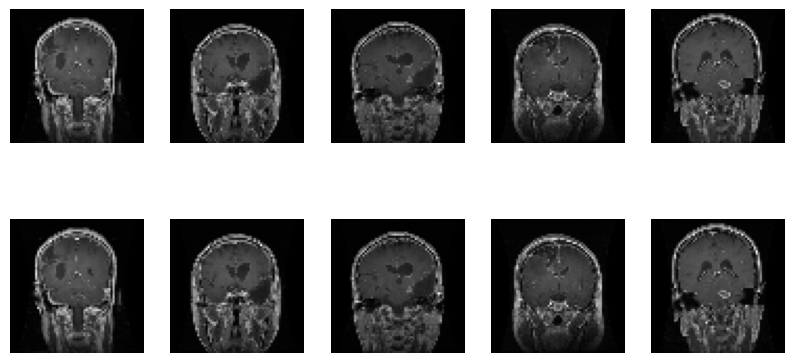

In [ ]:

# Step 5: Display original and PCA-reconstructed images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i],cmap='gray')  # Original image
    plt.axis('off')
    plt.subplot(2, 5, i+6)
    plt.imshow(X_pca_reconstructed[i],cmap='gray')  # Reconstructed image
    plt.axis('off')
plt.show()


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.5260
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 2.3321
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2.1500
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.9753
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.8085
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.6530
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.5108
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.3762
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1.2504
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.1356
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.0286
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.9294
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.8388
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7543
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6768
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━

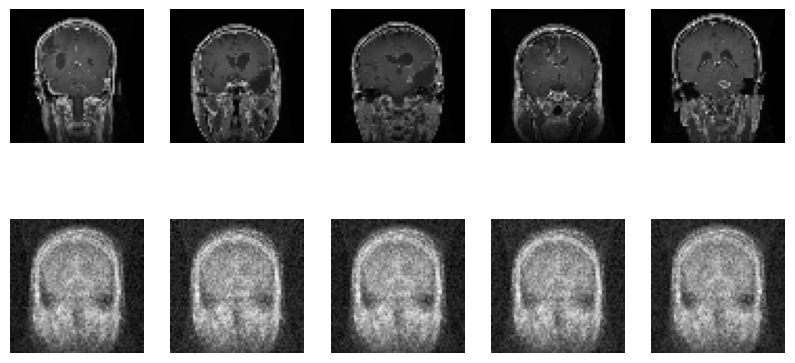

PCA Reconstruction Loss: 4.2077365388899866e-15
Autoencoder Reconstruction Loss: 0.008921034634113312


In [ ]:

# Step 6: Build an Autoencoder for comparison
input_img = layers.Input(shape=(64, 64, 1))

# Encoder: Flatten -> Dense (with regularization to prevent overfitting)
x = layers.Flatten()(input_img)
x = layers.Dense(128, activation='linear', kernel_regularizer=regularizers.l2(0.01))(x)
encoded = layers.Dense(64, activation='linear')(x)  # Compressed representation

# Decoder: Dense -> Reshape to original image shape
x = layers.Dense(128, activation='linear')(encoded)
x = layers.Dense(np.prod((64, 64, 1)), activation='linear')(x)
decoded = layers.Reshape((64, 64, 1))(x)  # Reshape to image format

# Autoencoder model
autoencoder = models.Model(input_img, decoded)

# Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train the Autoencoder
autoencoder.fit(images, images, epochs=20, batch_size=10, shuffle=True)

# Step 8: Reconstruct images using Autoencoder
X_autoencoder_reconstructed = autoencoder.predict(images)

# Step 9: Display original and Autoencoder-reconstructed images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i],cmap='gray')  # Original image
    plt.axis('off')
    plt.subplot(2, 5, i+6)
    plt.imshow(X_autoencoder_reconstructed[i],cmap='gray')  # Reconstructed image
    plt.axis('off')
plt.show()

# Step 10: Compare PCA and Autoencoder reconstruction loss
pca_reconstruction_loss = np.mean((images - X_pca_reconstructed) ** 2)
autoencoder_reconstruction_loss = np.mean((images - X_autoencoder_reconstructed) ** 2)

print(f"PCA Reconstruction Loss: {pca_reconstruction_loss}")
print(f"Autoencoder Reconstruction Loss: {autoencoder_reconstruction_loss}")
